### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [5]:
userdata=pd.read_csv('user.csv')
itemdata=pd.read_csv('item.csv')
data=pd.read_csv('Data.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [8]:
userdata.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
userdata.shape

(943, 5)

In [10]:
userdata.describe()


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [12]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [14]:
itemdata.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [17]:
itemdata.shape

(1681, 22)

In [19]:
itemdata.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
itemdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [22]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
data.shape

(100000, 4)

In [24]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [16]:
data.info()

(1681, 22)

#### 4. Find the number of movies per genre using the item data - 5 marks

In [25]:
genres = ['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']
print(itemdata[genres].sum(axis=0))

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

In [26]:
itemdata['Total Genres']=itemdata[genres].sum(axis=1)
morethan1genre=itemdata.apply(lambda x:True if x['Total Genres']>1else False,axis=1)
numofrows=len(morethan1genre[morethan1genre==True].index)
print('Number Of Movies having more than 1 Genre:',numofrows)

Number Of Movies having more than 1 Genre: 849


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [ ]:
genres = ['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
sns.distplot(userdata.age) 
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

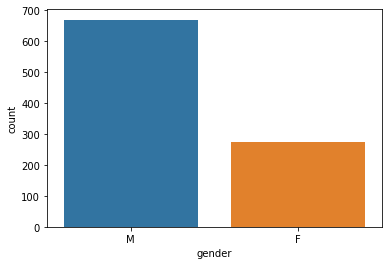

In [30]:
sns.countplot(userdata.gender)

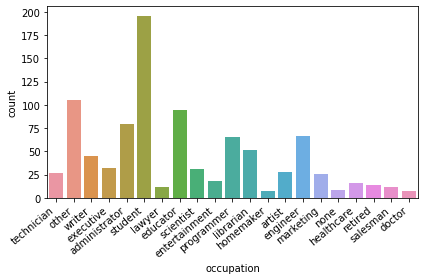

In [31]:
ax=sns.countplot(userdata.occupation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

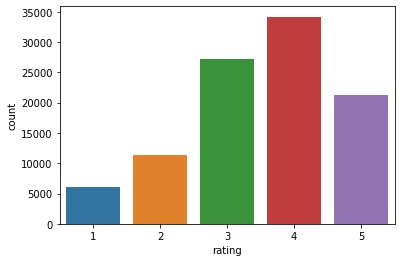

In [32]:
sns.countplot(data.rating)

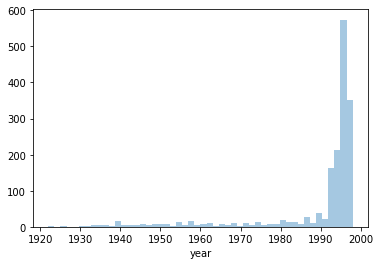

In [33]:
import datetime as dt
from datetime import datetime

itemdata.columns = itemdata.columns.str.replace(' ', '_')
itemdata['year'] =pd.DatetimeIndex(itemdata['release_date']).year
sns.distplot(itemdata.year,kde=False)

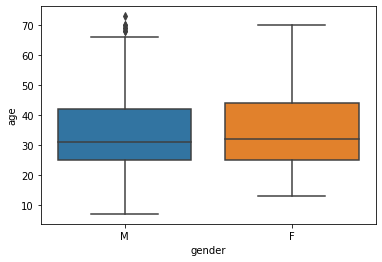

In [36]:
sns.boxplot(x=userdata['gender'],y=userdata['age'])

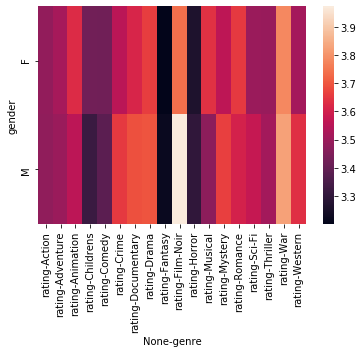

In [37]:
userdata.columns = userdata.columns.str.replace(' ', '_')

data.columns = data.columns.str.replace(' ', '_')
movie_rating=pd.merge(userdata,data)
lens=pd.merge(movie_rating,itemdata)
mdf = pd.melt(lens[['gender', 'rating'] + genres], 
              id_vars=['gender', 'rating'], var_name='genre')
mdf = mdf[mdf['value']==1][['gender', 'rating', 'genre']]
df = pd.pivot_table(mdf, columns = ['genre'], index = [ 'gender'], 
                    values = ['rating'], aggfunc = np.mean)
sns.heatmap(df)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

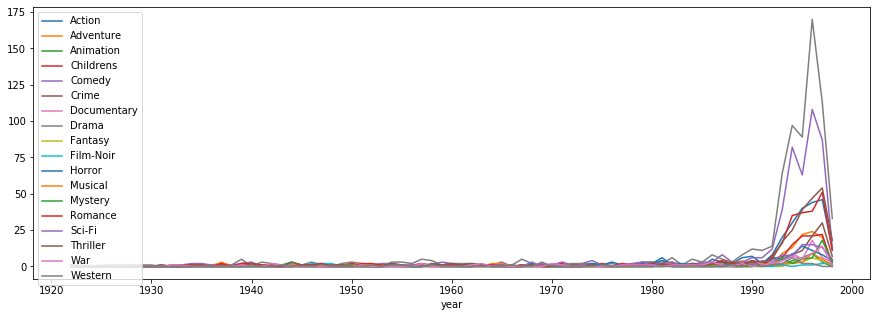

In [45]:
itemdata[['year','Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [46]:

rated=pd.merge(movie_rating,itemdata,on='movie_id')
movie_stats = rated.groupby('movie_title').agg({'rating': [np.size, np.mean]})
atleast100reviews = movie_stats['rating']['size'] >= 100
movie_stats[atleast100reviews].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                                     size      mean
movie_title                                                        
Close Shave, A                                        112  4.491071
Schindler's List                                      298  4.466443
Wrong Trousers, The                                   118  4.466102
Casablanca                                            243  4.456790
Shawshank Redemption, The                             283  4.445230
Rear Window                                           209  4.387560
Usual Suspects, The                                   267  4.385768
Star Wars                                             583  4.358491
12 Angry Men                                          125  4.344000
Citizen Kane                                          198  4.292929
To Kill a Mockingbird                                 219  4.292237
One Flew Over the Cuckoo's Nest                       264  4.291667
Silence of the Lambs, The                             390  4.289744
North by Northwest                                    179  4.284916
Godfather, The                                        413  4.283293
Secrets & Lies                                        162  4.265432
Good Will Hunting                                     198  4.262626
Manchurian Candidate, The                             131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark                               420  4.252381
Vertigo                                               179  4.251397
Titanic                                               350  4.245714
Lawrence of Arabia                                    173  4.231214
Maltese Falcon, The                                   138  4.210145
Empire Strikes Back, The                              367  4.204360

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [47]:
#True that men watch more Romance
rated.groupby(['Romance','gender']).size()

Romance  gender
0        F         19880
         M         60650
1        F          5858
         M         13603
dtype: int64

In [48]:
#FALSE that women watch more Sci-Fi
rated.groupby(['Sci-Fi','gender']).size()

Sci-Fi  gender
0       F         23109
        M         64152
1       F          2629
        M         10101
dtype: int64

In [49]:
#True that men watch more Drama
rated.groupby(['Drama','gender']).size()

Drama  gender
0      F         14730
       M         45366
1      F         11008
       M         28887
dtype: int64